In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Simple Linear Regression

**Over 60 years of Oceanographic data:** Is there a relationship between water salinity & water temperature? Can you predict the water temperature based on salinity?

In [19]:
data = pd.read_pickle("AgesAndHeights.pkl")
data.head()

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414


In [20]:
print(data.shape)
data.describe()

(100, 2)


,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


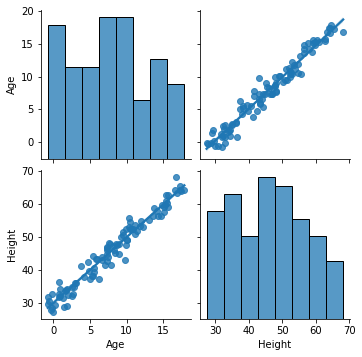

In [21]:
sns.pairplot(data, kind="reg")

In [23]:
#Data Cleaning
df = data[data['Age'] > 0]
df.head()

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414


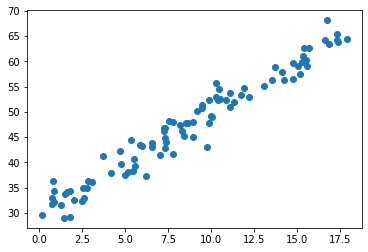

In [24]:
plt.scatter(df['Age'],df['Height'],label='Raw Data')
plt.show()

In [25]:
df.isnull().sum()

Age       0
Height    0
dtype: int64

In [28]:
X = np.array(df['Age']).reshape(-1, 1)
y = np.array(df['Height']).reshape(-1, 1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [33]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_pred = model.predict(X_test)                                     # Predict Linear Model
accuracy_score = model.score(X_test, y_test)                       # Accuracy score
print("Linear Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score))

Linear Regression Model Accuracy Score: 96.9%


In [36]:
print("R2 Score: " +"{:.3}".format(r2_score(y_test, y_pred)));

R2 Score: 0.969


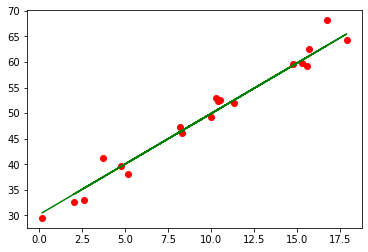

In [37]:
plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, y_pred, color='g')
plt.show()